In [771]:
from struct import unpack
import numpy as np
import matplotlib.pylab as plt 

def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

In [772]:
(images,labels)=loadmnist("train-images-idx3-ubyte", "train-labels-idx1-ubyte")

In [773]:
images.shape

(60000, 784)

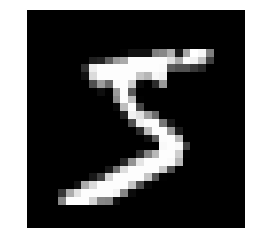

In [774]:
displaychar(images[0])

In [775]:
import pandas as pd
import scipy.stats

In [776]:
training_set_images=images[0:50000]
training_set_labels=labels[0:50000]
validation_set_images=images[50000:]
validation_set_labels=labels[50000:]

In [777]:
digits = pd.DataFrame(training_set_labels, columns=['digit'])
pi = []
total = len(training_set_labels) + 0.0
for i in range(10):
    pi.append(len(digits[digits['digit']==i])/total)


In [778]:
#Gaussian N(mean,cov)

digit_cov_matrix = []
digit_mean = []
for i in range(10):
    digit_class = training_set_images[digits['digit']==i]
    digit_cov = np.cov(digit_class.T)
    #digit_cov_matrix.append(digit_cov + c*np.identity(784))
    digit_cov_matrix.append(digit_cov)
    #A+CI where A is cov matric and I is Identity matrix. c is a constant. This is done to avoid det of matrix=0
    mean = []
    for i in range(784):
        mean.append(np.mean(digit_class[:,i]))
    digit_mean.append(mean)



In [779]:
C = [3000, 3250, 3350, 3500, 4000]
c = 0
for c in C:
    gaussian_model = [scipy.stats.multivariate_normal(digit_mean[j], digit_cov_matrix[j]+c*np.identity(784)) for j in range(10)]

    digit_prob = [[np.log(pi[j]) + gaussian_model[j].logpdf(validation_set_images[i]) for j in range(10)]
              for i in range(len(validation_set_labels))]

    digit_outcome = [np.where(digit_prob[i] == max(digit_prob[i]))[0][0] for i in range(len(digit_prob))]
    
    count = sum([digit_outcome[i] == validation_set_labels[i] for i in range(len(digit_outcome))])
    
    print "For c = ",c,"  Error rate = ",100-((count+0.0)/10000)*100,"%"

For c =  3000   Error rate =  4.14 %
For c =  3250   Error rate =  4.11 %
For c =  3350   Error rate =  4.1 %
For c =  3500   Error rate =  4.13 %
For c =  4000   Error rate =  4.14 %


After checking with lot of different c values, the best i got is c=3350 for which the Error rate on validation
set is 4.10%

In [780]:
(test_images,test_labels)=loadmnist("t10k-images-idx3-ubyte", "t10k-labels-idx1-ubyte")

In [781]:
c = 3350
gaussian_model = [scipy.stats.multivariate_normal(digit_mean[j], digit_cov_matrix[j]+c*np.identity(784)) for j in range(10)]

digit_prob = [[np.log(pi[j]) + gaussian_model[j].logpdf(test_images[i]) for j in range(10)]
              for i in range(len(test_images))]

digit_outcome = [np.where(digit_prob[i] == max(digit_prob[i]))[0][0] for i in range(len(digit_prob))]
    
count = sum([digit_outcome[i] == test_labels[i] for i in range(len(digit_outcome))])
    
print "Error rate on Test data = ",100-((count+0.0)/10000)*100,"%"

Error rate on Test data =  4.32 %


 Actual digit:  9    Misclassified digit:  7


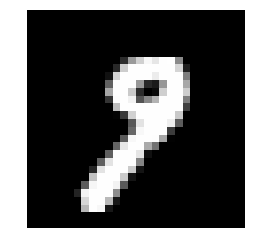

Posterior probability:  [-4175.5711269609092, -4143.41167039433, -4128.5374748637942, -4122.9959242992954, -4118.7305208875068, -4156.5087303346118, -4241.4071047878178, -4054.9860648237645, -4086.0657040610995, -4060.8455034368149] 

 Actual digit:  7    Misclassified digit:  9


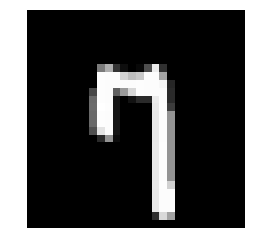

Posterior probability:  [-4195.0664003830798, -4243.3099367106952, -4179.4708381532282, -4143.8181749760479, -4090.5573747294202, -4136.9182719635955, -4246.9311817546086, -4053.5322574626416, -4130.8060997856091, -4053.2355008765853] 

 Actual digit:  7    Misclassified digit:  1


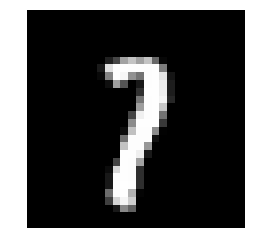

Posterior probability:  [-4148.7183080561435, -4022.1883130630304, -4084.1188976231338, -4095.8449442288793, -4071.8716325938417, -4129.7339348194973, -4163.000706830283, -4032.4189970604534, -4063.991022239964, -4054.1426404826821] 

 Actual digit:  9    Misclassified digit:  8


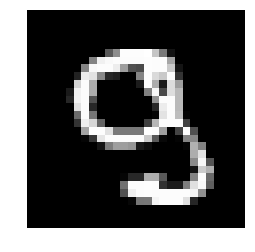

Posterior probability:  [-4221.2641039781365, -4479.2471615266004, -4180.1498419790059, -4181.5801206506203, -4194.9744019787458, -4181.054259765082, -4329.8436399256052, -4263.4469941170728, -4149.2846010834237, -4172.8900611481513] 

 Actual digit:  7    Misclassified digit:  1


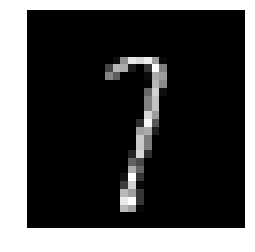

Posterior probability:  [-4103.5883557854168, -4017.7219567447664, -4086.6465557983124, -4077.5782623438404, -4056.0327306493105, -4091.7350988666913, -4107.4905231837874, -4028.6098753538581, -4068.10497070981, -4030.8132370359854] 



In [782]:
count = 0
for i in range(len(digit_outcome)):
    if digit_outcome[i] != test_labels[i]:
        print " Actual digit: ",test_labels[i],"   Misclassified digit: ",digit_outcome[i]
        count += 1
        displaychar(test_images[i])
        print "Posterior probability: ",digit_prob[i],"\n"
        if count == 5:
            break
        